# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Your code here! :)
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import time

df = pd.read_csv('GermanCredit.csv.zip')
df.columns
label_encoder = LabelEncoder()
df.Class = label_encoder.fit_transform(df.Class)
df.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [3]:
y = df.Class
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)
#1 == good, 0 == bad
X = df.drop(['Class'], axis =1)
pm = {"max_depth" : [5,7,9,11,13,15,17],
      'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45], 'min_samples_leaf':[1,3,5,7,10,15,20],
     "max_features":["auto","log2","sqrt",None], }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
sh = GridSearchCV(estimator=clf,param_grid = pm, scoring = 'accuracy').fit(X_train,y_train)
sh.cv_results_
sh.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 25}

In [10]:
clf = DecisionTreeClassifier(splitter = 'random', max_features = sh.best_params_['max_features'],
                             max_depth = sh.best_params_['max_depth'],
                             min_samples_split = sh.best_params_['min_samples_split'],
                             min_samples_leaf = sh.best_params_['min_samples_leaf'],
                            )
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.7066666666666667

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [5]:
#! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [6]:
# Your code here! :)
from dtreeviz.trees import *
viz = dtreeviz(clf, X_train, y_train, target_name='loan worthiness', feature_names = X.columns, class_names=['bad', 'good'])
viz

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Your code here! :)
rf_clf = RandomForestClassifier(n_estimators = 300, 
                                random_state = 17)
rf_clf.fit(X_train, y_train)
accuracy_score(rf_clf.predict(X_test), y_test)

0.77

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

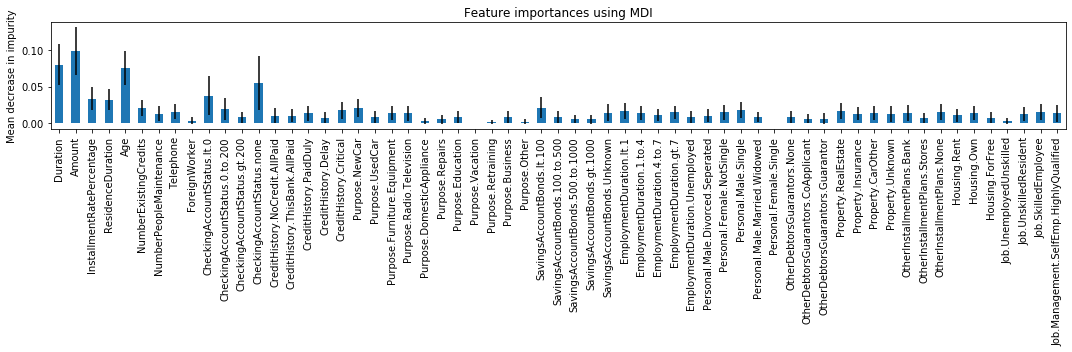

In [13]:
# Your code here
import numpy as np
plt.rcParams['figure.figsize'] = [15, 5]

importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
#! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

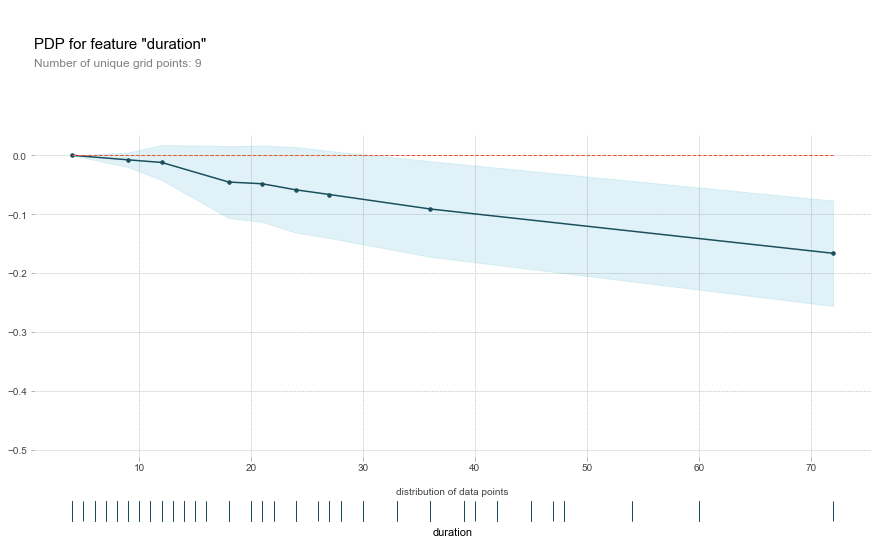

In [14]:
# Your code here!
from pdpbox import pdp, get_dataset, info_plots

pdp_duration = pdp.pdp_isolate(
    model=rf_clf, dataset=df, model_features=X.columns, feature='Duration'
)

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_duration, feature_name='duration', plot_pts_dist=True)

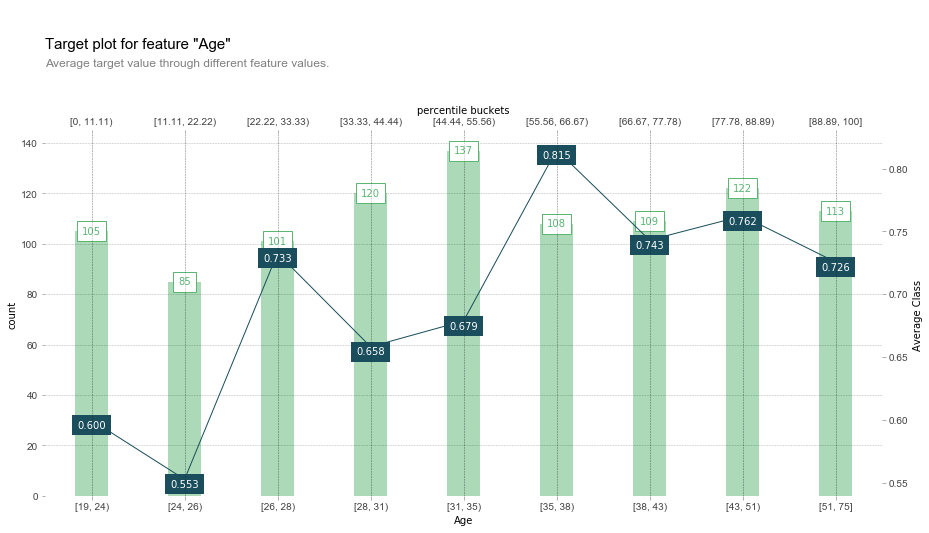

In [15]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='Age', feature_name='Age', target='Class', show_percentile=True
)

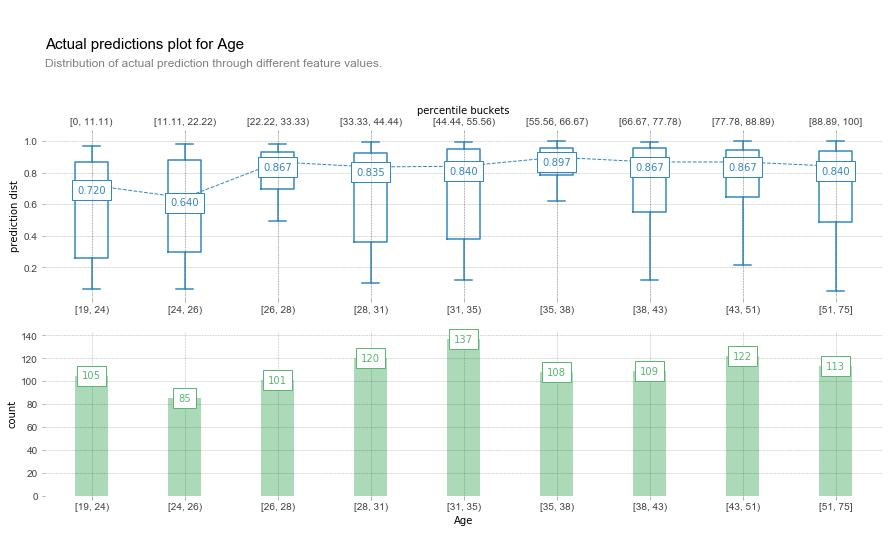

In [16]:
fig, axes, summary_df = info_plots.actual_plot(
    model=rf_clf, X=X, feature='Age', feature_name='Age', 
    show_percentile=True
)

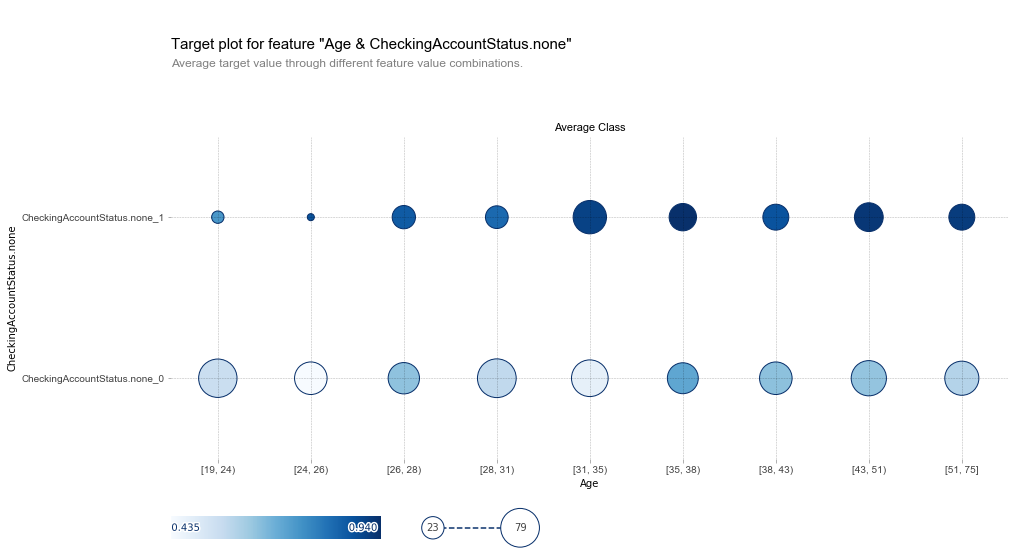

In [17]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=df, features=['Age', 'CheckingAccountStatus.none'], feature_names=['Age', 'CheckingAccountStatus.none'], 
    target='Class'
)

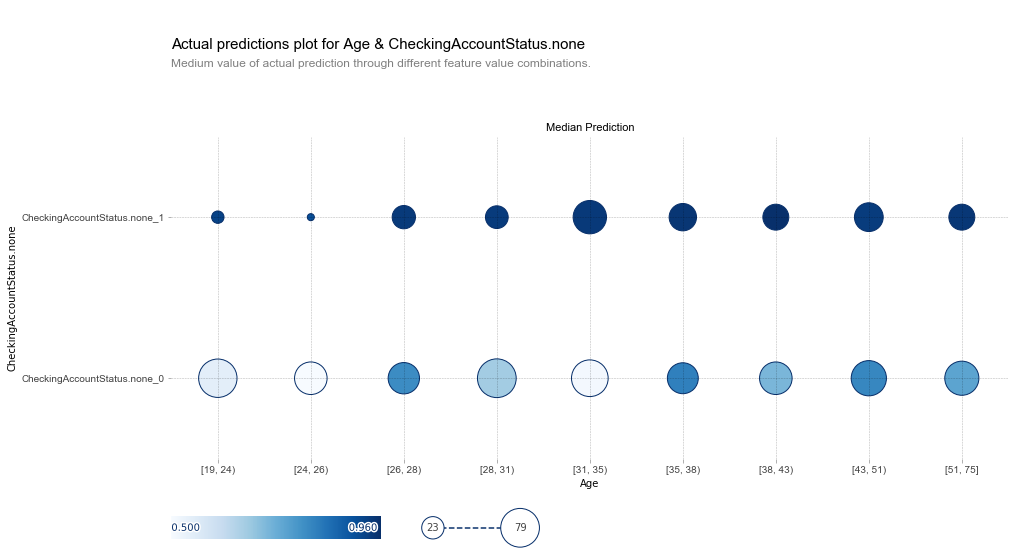

In [18]:
fig, axes, summary_df = info_plots.actual_plot_interact(
    model=rf_clf, X=X, features=['Age', 'CheckingAccountStatus.none'], 
    feature_names=['Age', 'CheckingAccountStatus.none']
)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
#! conda install -c anaconda py-xgboost

In [ ]:
#! conda install -c conda-forge catboost

In [ ]:
#! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

In [19]:
from xgboost import XGBClassifier

XG_clf = XGBClassifier()
XG_clf.fit(X_train, y_train)
XG_score = accuracy_score(XG_clf.predict(X_test), y_test)
XG_score

[22:02:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7666666666666667

In [21]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)
cat_score = accuracy_score(cat_clf.predict(X_test), y_test),
cat_score

Learning rate set to 0.008847
0:	learn: 0.6895681	total: 2.3ms	remaining: 2.3s
1:	learn: 0.6855667	total: 4.33ms	remaining: 2.16s
2:	learn: 0.6812957	total: 6.3ms	remaining: 2.09s
3:	learn: 0.6773381	total: 8.16ms	remaining: 2.03s
4:	learn: 0.6733371	total: 9.89ms	remaining: 1.97s
5:	learn: 0.6698312	total: 11.6ms	remaining: 1.91s
6:	learn: 0.6663389	total: 13.6ms	remaining: 1.92s
7:	learn: 0.6630299	total: 15.2ms	remaining: 1.88s
8:	learn: 0.6604254	total: 16.7ms	remaining: 1.84s
9:	learn: 0.6570790	total: 18.2ms	remaining: 1.8s
10:	learn: 0.6536949	total: 20.1ms	remaining: 1.81s
11:	learn: 0.6503346	total: 21.6ms	remaining: 1.78s
12:	learn: 0.6469911	total: 22.9ms	remaining: 1.74s
13:	learn: 0.6437313	total: 24.2ms	remaining: 1.7s
14:	learn: 0.6402591	total: 25.5ms	remaining: 1.67s
15:	learn: 0.6372221	total: 26.8ms	remaining: 1.65s
16:	learn: 0.6341087	total: 28.1ms	remaining: 1.62s
17:	learn: 0.6319133	total: 28.7ms	remaining: 1.56s
18:	learn: 0.6294400	total: 29.9ms	remaining: 1.5

162:	learn: 0.4434176	total: 191ms	remaining: 980ms
163:	learn: 0.4430295	total: 192ms	remaining: 979ms
164:	learn: 0.4424356	total: 193ms	remaining: 977ms
165:	learn: 0.4419755	total: 194ms	remaining: 974ms
166:	learn: 0.4411570	total: 195ms	remaining: 971ms
167:	learn: 0.4405679	total: 196ms	remaining: 969ms
168:	learn: 0.4399128	total: 197ms	remaining: 971ms
169:	learn: 0.4390329	total: 199ms	remaining: 970ms
170:	learn: 0.4381997	total: 200ms	remaining: 969ms
171:	learn: 0.4372868	total: 201ms	remaining: 968ms
172:	learn: 0.4369966	total: 202ms	remaining: 967ms
173:	learn: 0.4363851	total: 204ms	remaining: 967ms
174:	learn: 0.4356427	total: 206ms	remaining: 969ms
175:	learn: 0.4348679	total: 207ms	remaining: 968ms
176:	learn: 0.4340833	total: 208ms	remaining: 966ms
177:	learn: 0.4335938	total: 209ms	remaining: 964ms
178:	learn: 0.4328100	total: 210ms	remaining: 963ms
179:	learn: 0.4324123	total: 211ms	remaining: 961ms
180:	learn: 0.4318350	total: 212ms	remaining: 960ms
181:	learn: 

344:	learn: 0.3530903	total: 385ms	remaining: 730ms
345:	learn: 0.3526646	total: 386ms	remaining: 729ms
346:	learn: 0.3523075	total: 386ms	remaining: 727ms
347:	learn: 0.3519420	total: 388ms	remaining: 726ms
348:	learn: 0.3514621	total: 388ms	remaining: 725ms
349:	learn: 0.3511799	total: 389ms	remaining: 723ms
350:	learn: 0.3506722	total: 391ms	remaining: 722ms
351:	learn: 0.3502252	total: 392ms	remaining: 721ms
352:	learn: 0.3497143	total: 393ms	remaining: 720ms
353:	learn: 0.3494511	total: 394ms	remaining: 718ms
354:	learn: 0.3490775	total: 395ms	remaining: 717ms
355:	learn: 0.3488161	total: 396ms	remaining: 716ms
356:	learn: 0.3485136	total: 397ms	remaining: 715ms
357:	learn: 0.3482021	total: 398ms	remaining: 714ms
358:	learn: 0.3475021	total: 399ms	remaining: 713ms
359:	learn: 0.3471603	total: 401ms	remaining: 712ms
360:	learn: 0.3468703	total: 402ms	remaining: 711ms
361:	learn: 0.3464647	total: 403ms	remaining: 710ms
362:	learn: 0.3462621	total: 404ms	remaining: 708ms
363:	learn: 

526:	learn: 0.2948756	total: 577ms	remaining: 518ms
527:	learn: 0.2946142	total: 578ms	remaining: 516ms
528:	learn: 0.2941218	total: 579ms	remaining: 515ms
529:	learn: 0.2940305	total: 580ms	remaining: 514ms
530:	learn: 0.2938862	total: 581ms	remaining: 513ms
531:	learn: 0.2936182	total: 582ms	remaining: 512ms
532:	learn: 0.2934050	total: 583ms	remaining: 511ms
533:	learn: 0.2931634	total: 584ms	remaining: 510ms
534:	learn: 0.2929235	total: 585ms	remaining: 508ms
535:	learn: 0.2927039	total: 586ms	remaining: 507ms
536:	learn: 0.2924395	total: 587ms	remaining: 506ms
537:	learn: 0.2922556	total: 588ms	remaining: 505ms
538:	learn: 0.2919941	total: 589ms	remaining: 504ms
539:	learn: 0.2917861	total: 590ms	remaining: 503ms
540:	learn: 0.2915597	total: 592ms	remaining: 502ms
541:	learn: 0.2913154	total: 593ms	remaining: 501ms
542:	learn: 0.2909642	total: 594ms	remaining: 500ms
543:	learn: 0.2907785	total: 595ms	remaining: 499ms
544:	learn: 0.2906015	total: 596ms	remaining: 498ms
545:	learn: 

705:	learn: 0.2502826	total: 769ms	remaining: 320ms
706:	learn: 0.2501351	total: 771ms	remaining: 319ms
707:	learn: 0.2499951	total: 772ms	remaining: 318ms
708:	learn: 0.2498646	total: 773ms	remaining: 317ms
709:	learn: 0.2497013	total: 774ms	remaining: 316ms
710:	learn: 0.2494412	total: 775ms	remaining: 315ms
711:	learn: 0.2492017	total: 776ms	remaining: 314ms
712:	learn: 0.2488976	total: 777ms	remaining: 313ms
713:	learn: 0.2485622	total: 778ms	remaining: 312ms
714:	learn: 0.2483614	total: 779ms	remaining: 311ms
715:	learn: 0.2481125	total: 781ms	remaining: 310ms
716:	learn: 0.2479083	total: 783ms	remaining: 309ms
717:	learn: 0.2477524	total: 784ms	remaining: 308ms
718:	learn: 0.2474993	total: 785ms	remaining: 307ms
719:	learn: 0.2472575	total: 786ms	remaining: 306ms
720:	learn: 0.2471158	total: 787ms	remaining: 304ms
721:	learn: 0.2468982	total: 788ms	remaining: 303ms
722:	learn: 0.2466491	total: 789ms	remaining: 302ms
723:	learn: 0.2462278	total: 790ms	remaining: 301ms
724:	learn: 

879:	learn: 0.2115330	total: 961ms	remaining: 131ms
880:	learn: 0.2113257	total: 962ms	remaining: 130ms
881:	learn: 0.2111179	total: 964ms	remaining: 129ms
882:	learn: 0.2109095	total: 965ms	remaining: 128ms
883:	learn: 0.2107427	total: 966ms	remaining: 127ms
884:	learn: 0.2105246	total: 967ms	remaining: 126ms
885:	learn: 0.2103893	total: 968ms	remaining: 125ms
886:	learn: 0.2101064	total: 969ms	remaining: 123ms
887:	learn: 0.2099589	total: 970ms	remaining: 122ms
888:	learn: 0.2097443	total: 971ms	remaining: 121ms
889:	learn: 0.2095418	total: 973ms	remaining: 120ms
890:	learn: 0.2093158	total: 974ms	remaining: 119ms
891:	learn: 0.2091754	total: 975ms	remaining: 118ms
892:	learn: 0.2089876	total: 976ms	remaining: 117ms
893:	learn: 0.2088096	total: 977ms	remaining: 116ms
894:	learn: 0.2086437	total: 978ms	remaining: 115ms
895:	learn: 0.2084918	total: 979ms	remaining: 114ms
896:	learn: 0.2081898	total: 980ms	remaining: 113ms
897:	learn: 0.2079156	total: 981ms	remaining: 111ms
898:	learn: 

(0.7833333333333333,)

In [22]:
from lightgbm import LGBMClassifier
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train,y_train)

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)